# Import data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Assign path string to variable
path = r'D:\Docs\Career Foundry\II. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis - Alina Racu'

In [4]:
# Import pkl file
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_subset_variables_new.pkl'))

In [4]:
# Check
ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# Bar charts

<AxesSubplot:>

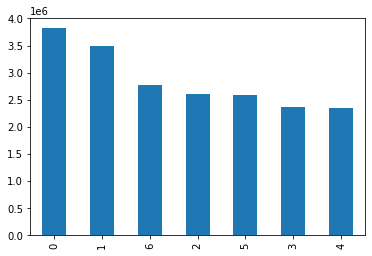

In [5]:
# Create a bar chart for the "orders_day_of_the_week" column
ords_prods_merged["order_day_of_the_week"].value_counts().plot.bar()

<AxesSubplot:>

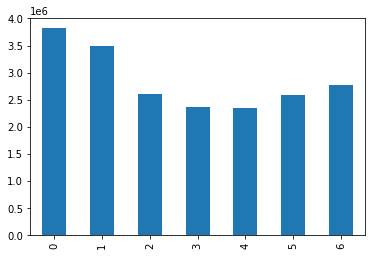

In [6]:
# Create a bar chart for the "orders_day_of_the_week" column with categories re-sorted acc to their index order
ords_prods_merged["order_day_of_the_week"].value_counts().sort_index().plot.bar()

<AxesSubplot:>

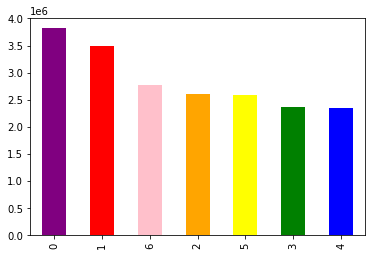

In [7]:
# Create a bar chart for the "orders_day_of_the_week" column with colored bars
ords_prods_merged["order_day_of_the_week"].value_counts().plot.bar(color = ["purple", "red", "pink", "orange","yellow", "green", "blue"])

In [8]:
# Print frequencies
ords_prods_merged["order_day_of_the_week"].value_counts(dropna = False)

0    3818311
1    3496755
6    2773796
2    2599806
5    2597128
3    2372407
4    2342129
Name: order_day_of_the_week, dtype: int64

In [9]:
# Print frequencies with columns in their indexed order
ords_prods_merged["order_day_of_the_week"].value_counts(dropna = False).sort_index()

0    3818311
1    3496755
2    2599806
3    2372407
4    2342129
5    2597128
6    2773796
Name: order_day_of_the_week, dtype: int64

# Export bar charts

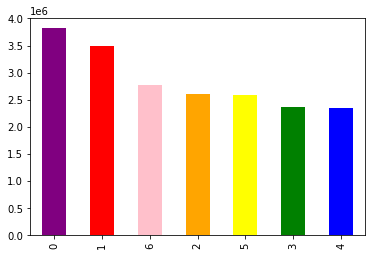

In [10]:
# Save bar chart within "bar" object
bar = ords_prods_merged["order_day_of_the_week"].value_counts().plot.bar(color = ["purple", "red", "pink", "orange","yellow", "green", "blue"])

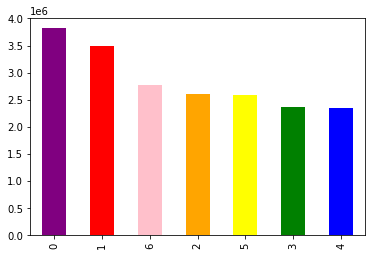

In [11]:
# Call "bar" object
bar.figure

In [26]:
# Export bar chart outside Jupyter as image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Exercise','bar_orders_dow.png'))

# Histograms & scatterplots

<AxesSubplot:ylabel='Frequency'>

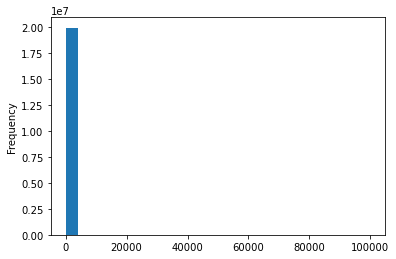

In [13]:
# Create a histogram for the "prices" column
ords_prods_merged["prices"].plot.hist(bins = 25)

In [14]:
# Investigate
ords_prods_merged["prices"].describe()

count    1.998182e+07
mean     1.177559e+01
std      4.761211e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
ords_prods_merged["prices"].mean()

11.775589535000698

In [16]:
ords_prods_merged["prices"].median()

7.4

In [17]:
ords_prods_merged["prices"].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

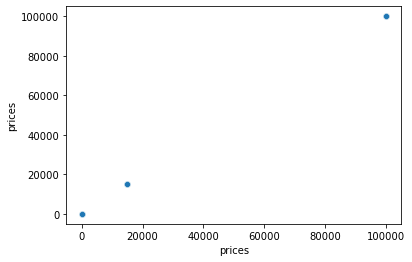

In [18]:
# Create scatterplot to identify outliers
sns.scatterplot(x = "prices", y = "prices", data = ords_prods_merged)

In [19]:
# Determine whether there are any values above the "normal" price of a supermarket item, e.g 100
ords_prods_merged.loc[ords_prods_merged["prices"] > 100]

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16534,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16540,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53712,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967926,928073,126590,25,1,14,3.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Most orders,69,Loyal customer,46.564462,High spender,5.0,Frequent customer
19968408,1049906,126590,67,2,7,5.0,21553,11,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,69,Loyal customer,46.564462,High spender,5.0,Frequent customer
19968524,2728374,126592,3,1,18,30.0,21553,16,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,14,Regular customer,92.130726,High spender,14.0,Regular customer
19972138,1579853,126620,30,3,7,23.0,21553,10,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Slowest days,Average orders,32,Regular customer,74.618349,High spender,9.0,Frequent customer


In [20]:
# Show all columns (do not assign any options re the max number of columns to display)
pd.options.display.max_columns = None

In [21]:
ords_prods_merged.loc[ords_prods_merged["prices"] > 100]

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16534,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16540,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53712,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967926,928073,126590,25,1,14,3.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Busiest days,Most orders,69,Loyal customer,46.564462,High spender,5.0,Frequent customer
19968408,1049906,126590,67,2,7,5.0,21553,11,1,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,69,Loyal customer,46.564462,High spender,5.0,Frequent customer
19968524,2728374,126592,3,1,18,30.0,21553,16,0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,14,Regular customer,92.130726,High spender,14.0,Regular customer
19972138,1579853,126620,30,3,7,23.0,21553,10,0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Slowest days,Average orders,32,Regular customer,74.618349,High spender,9.0,Frequent customer


In [22]:
# Mark outliers as missing (NaN)
ords_prods_merged.loc[ords_prods_merged["prices"] > 100, "prices"] = np.nan

In [23]:
# Check whether the replacement was successful
ords_prods_merged["prices"].max()

25.0

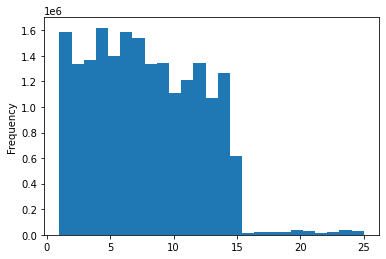

In [27]:
# Create a clean histogram for the "prices" column
hist = ords_prods_merged["prices"].plot.hist(bins = 25)

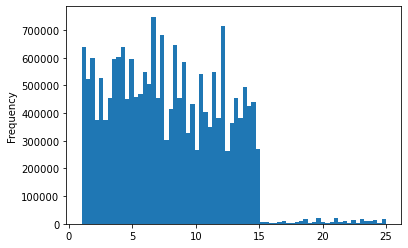

In [28]:
# Increase the level of granularity of the histogram
hist_2 = ords_prods_merged["prices"].plot.hist(bins = 70)

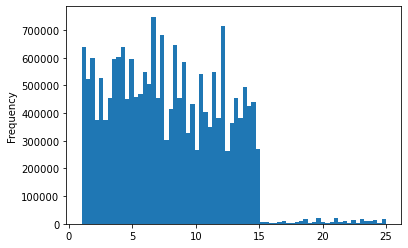

In [29]:
# Call histogram figure
hist_2.figure

# Export histograms

In [30]:
# Export histogram outside Jupyter as image file
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Exercise', 'hist_prices.png'))

In [31]:
# Export histogram outside Jupyter as image file
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Exercise', 'hist_2_prices.png'))

# Line charts & data sampling

In [32]:
# Create subset, as line charts require a lot of computing power
df = ords_prods_merged[:2000000]
# But this subset is not representative of the entire population of the df!

In [33]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [34]:
# dev is a boolean list
dev

array([False,  True, False, ...,  True, False, False])

In [35]:
# Produce 10 random numbers
np.random.rand(10)

array([0.51108511, 0.10053583, 0.09691507, 0.76118771, 0.92850397,
       0.94789256, 0.22860528, 0.48836045, 0.24738444, 0.84052258])

In [36]:
# Use the list to split the dataframe into 2 samples

In [37]:
# Store 70% of the sample in the df big
big = ords_prods_merged[dev]

In [38]:
# Store 30% of the sample in the df small
small = ords_prods_merged[~dev]

In [39]:
# Check
len(ords_prods_merged)

20000332

In [40]:
# Check
len(big) + len(small)

20000332

In [42]:
# Reduce the samples to the columns necessary for the line chart
df_2 = small[["order_day_of_the_week", "prices"]]

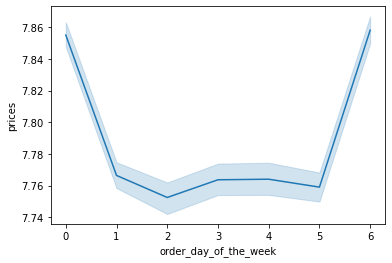

In [43]:
# Create line chart
line = sns.lineplot(data = df_2, x = "order_day_of_the_week", y = "prices")

In [44]:
df_3 = big[["order_day_of_the_week", "prices"]]

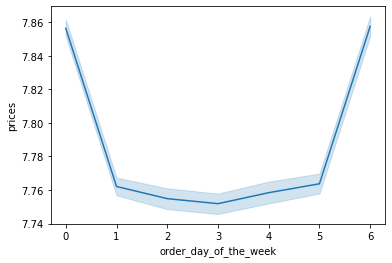

In [45]:
# Create line chart
line_2 = sns.lineplot(data = df_3, x = "order_day_of_the_week", y = "prices")

# Export line charts

In [46]:
# Export line chart outside Jupyter as image file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Exercise', 'line_order_dow_prices.png'))

In [47]:
# Export line chart outside Jupyter as image file
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Exercise', 'line_2_order_dow_prices.png'))

# Crosstabs

In [5]:
# There are some missing values in the "days_since_prior_order" column
# You can only assume that these missing values were caused by the fact that there can't be any days before a first order
# Check assumption
crosstab = pd.crosstab(ords_prods_merged['days_since_prior_order'], ords_prods_merged['order_number'], dropna = False)

In [6]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,12488,12393,10847,10160,9782,9090,8813,7884,7257,...,757,679,687,555,857,684,752,575,684,537
1.0,0,19201,18434,16954,16120,15637,15074,14320,13308,12993,...,1593,1653,1748,1670,1534,1596,1535,1520,1555,1424
2.0,0,28395,28212,27486,25297,24949,23388,23128,21894,21129,...,2368,2125,1940,2241,1943,1816,1722,1797,1905,1770
3.0,0,37874,39058,37382,34843,34740,32606,30972,30397,29469,...,1937,2062,1650,1841,1628,1596,1653,1609,1183,1398
4.0,0,46604,49388,45573,43466,40174,38572,37047,36044,35584,...,1387,1251,1619,1258,1053,1073,1103,1047,1012,1228
5.0,0,54661,55650,53616,51030,48381,44777,43001,40172,38891,...,1181,990,841,608,841,775,748,474,590,490
6.0,0,74227,77391,70267,65382,62170,58361,55436,53624,48874,...,440,549,461,542,455,350,293,404,334,337
7.0,0,114850,111141,102908,97932,89131,84598,79924,74480,71381,...,446,351,337,304,260,301,284,260,331,209
8.0,0,68404,68367,63428,59323,53887,51844,48200,44994,40975,...,123,190,135,118,128,142,122,77,95,53


In [ ]:
# All the missing values from "days_since_prior_order" fall where the order number is equal to 1

In [7]:
# Copy the table straight to your clipboard
crosstab.to_clipboard()

# Then paste in Excel